In [199]:
#import library

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print("Import complete")

Import complete


In [201]:
#Load&Clean data 

In [202]:
df = pd.read_csv('HousingData.csv')
df.shape

(506, 14)

In [203]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [204]:
df.shape

(506, 14)

In [205]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [206]:
df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

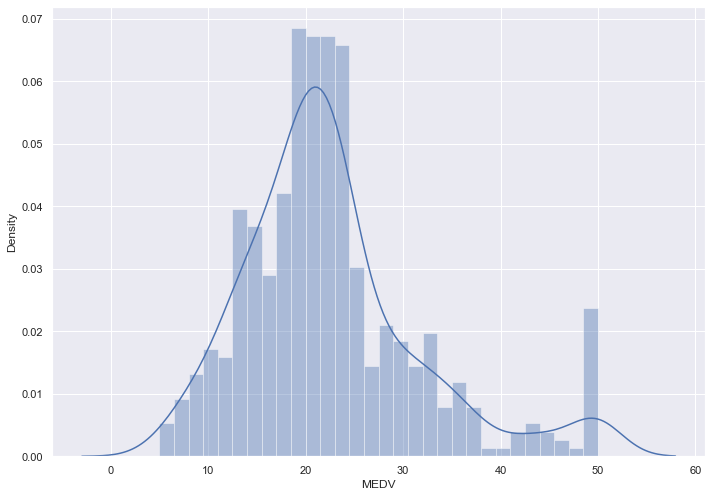

In [207]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [208]:
df_full = df
df = df[~(df['MEDV'] >= 50.0)]
print(np.shape(df))

(490, 14)


In [209]:
#EDA

<AxesSubplot:>

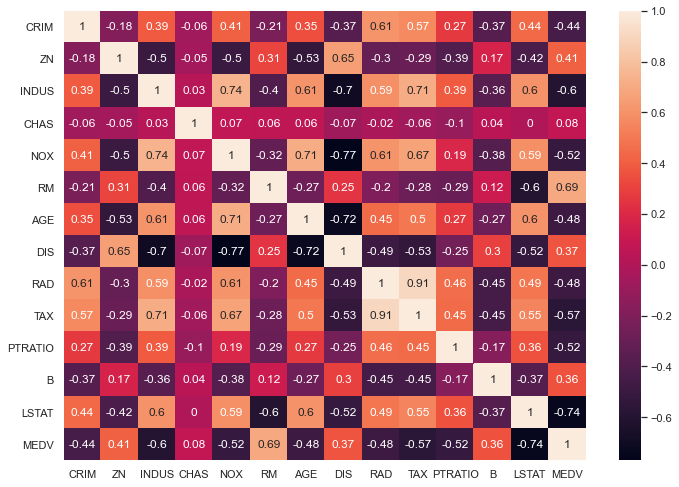

In [210]:
sns.heatmap(df.corr().round(2), annot=True)

(490, 7)
(490,)


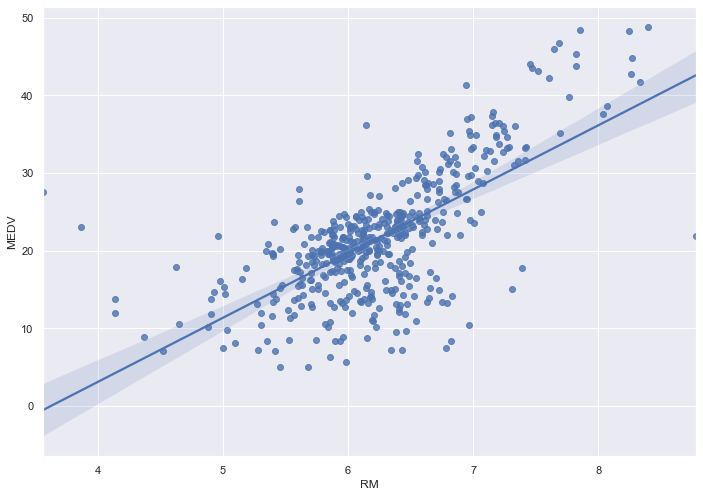

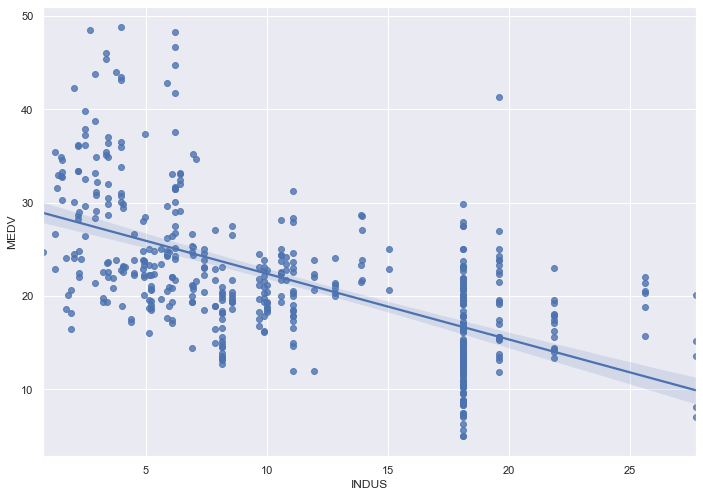

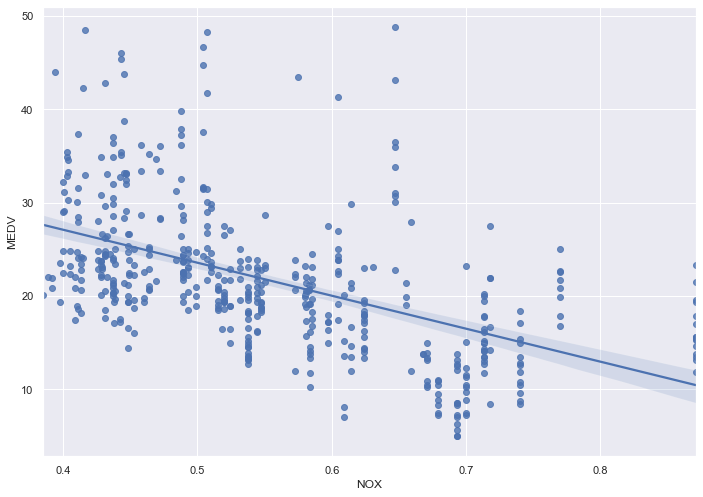

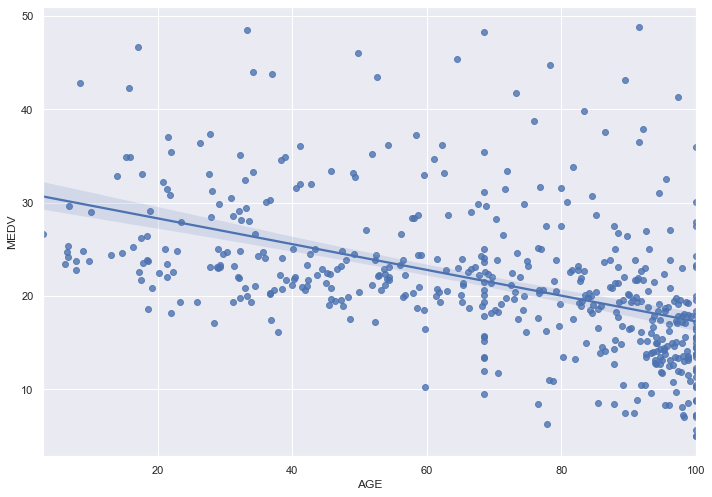

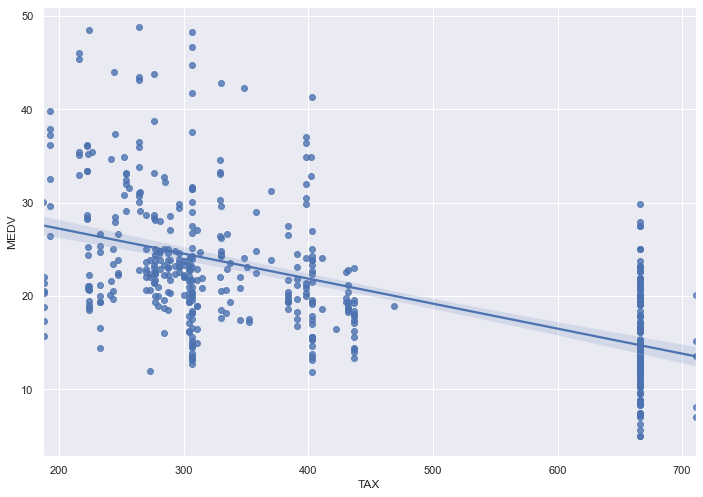

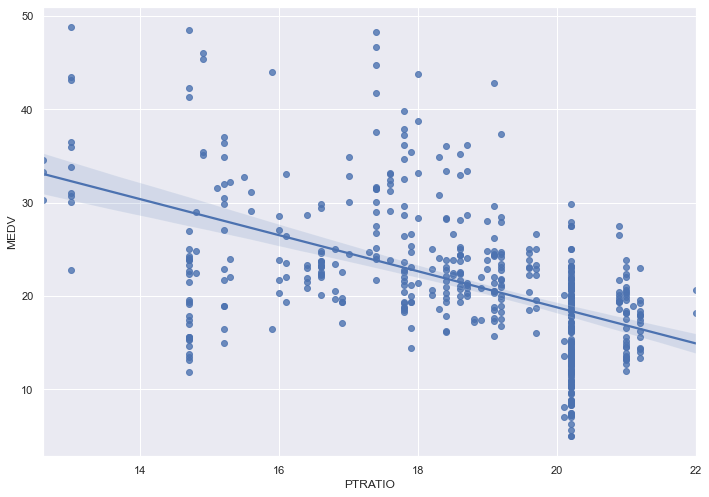

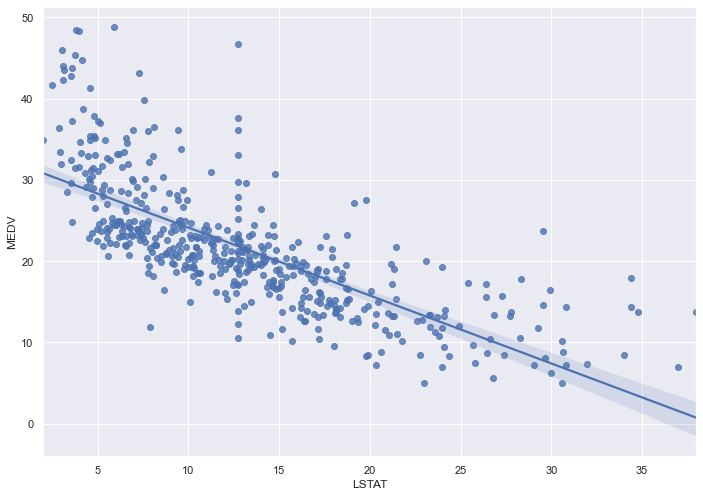

In [211]:
Column_feature = ["RM", "INDUS", "NOX", "AGE", "TAX", "PTRATIO", "LSTAT"]
X = df.loc[:, Column_feature]
Y = df.MEDV

print(X.shape)
print(Y.shape)


for k in Column_feature:
    sns.regplot(X[k], Y)
    plt.show()


In [212]:
#Train & Evaluation model 

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("Train Test split")
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Train Test split
(392, 7)
(392,)
(98, 7)
(98,)


RMSE train set : 4.120642644041989
RMSE test set : 4.235306995653617


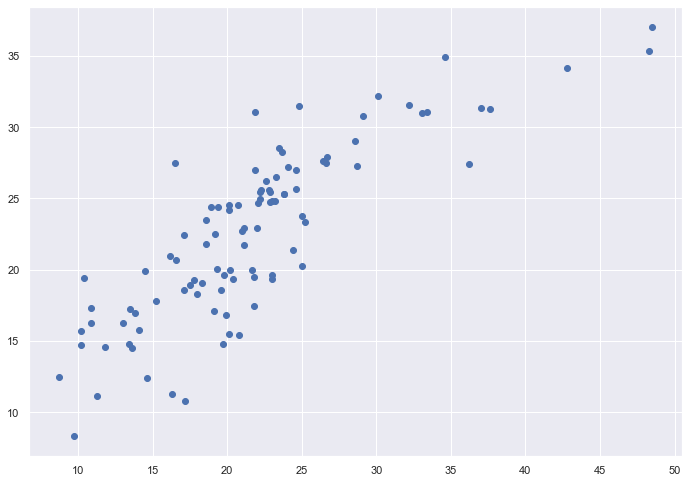

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Lireg = LinearRegression()
Lireg.fit(X_train, Y_train)

Y_train_predict = Lireg.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, Y_train_predict))
print("RMSE train set : {}" .format(rmse))

Y_test_predict = Lireg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_test_predict))
print("RMSE test set : {}" .format(rmse))

plt.scatter(Y_test, Y_test_predict)
plt.show()



In [215]:
Column_feature = ["RM", "INDUS", "NOX", "AGE", "TAX", "PTRATIO", "LSTAT"]
X = df_full.loc[:, Column_feature]
Y = df_full.MEDV

print(X.shape)
print(Y.shape)

Y_predict = Lireg.predict(X)
rmse = np.sqrt(mean_squared_error(Y, Y_predict))
print("RMSE train set : {}" .format(rmse))

(506, 7)
(506,)
RMSE train set : 5.409110996802878


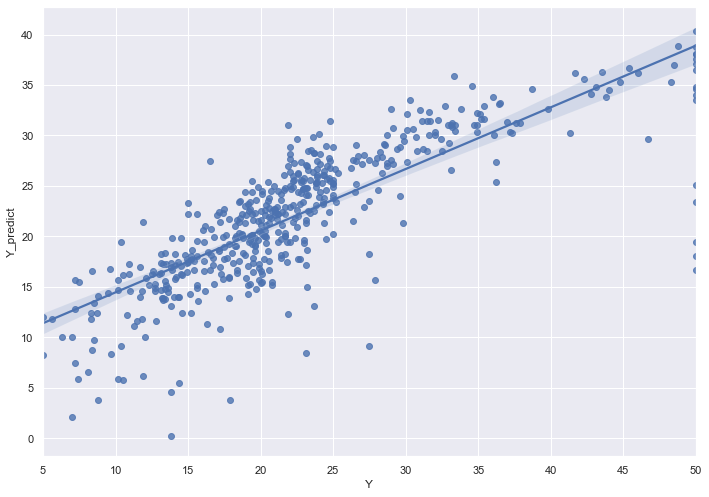

In [222]:
sns.regplot(Y, Y_predict)
plt.xlabel("Y")
plt.ylabel("Y_predict")
plt.show()